In [14]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, cross_validate
import copy
register_matplotlib_converters()

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month'])\
       .rename(columns={'#Passengers':'Passengers'})

In [3]:
df['y-1'] = df['Passengers'].shift(periods=1)

In [4]:
df.head()

,Passengers,y-1
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


### train test split

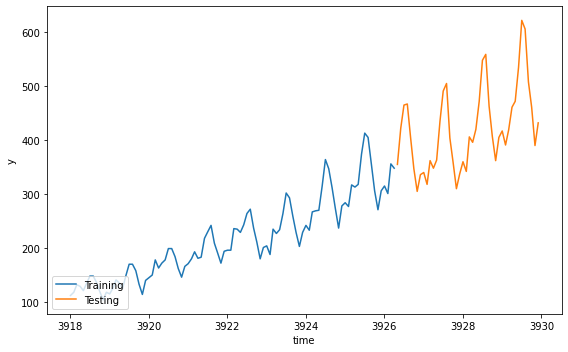

In [10]:
train_split = 0.7 # this is the training fraction
fig, ax = plt.subplots(1, figsize=(8, 5))
split = int(train_split*len(df))
df_train, df_test = df.iloc[:split], df.iloc[split:]
ax.plot(df_train['Passengers'], label = 'Training')
ax.plot(df_test['Passengers'], label = 'Testing')
ax.set_ylabel('y')
ax.legend(loc=3, facecolor='w')
ax.set_xlabel('time')
fig.tight_layout()

### train/validation test split

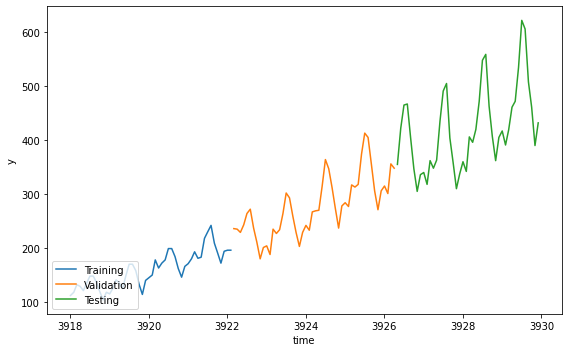

In [16]:
# split into train, validation and test
train_split = 0.7
valid_split = 0.5
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
split_1 = int(train_split * len(df))
split_2 = int(valid_split * split_1)
df_train_valid, df_test = df.iloc[:split_1], df.iloc[split_1:]
df_train, df_valid = df_train_valid[:split_2], df_train_valid[split_2:]
ax.plot(df_train['Passengers'], label = 'Training')
ax.plot(df_valid['Passengers'], label = 'Validation')
ax.plot(df_test['Passengers'], label = 'Testing')
ax.set_ylabel('y')
ax.legend(loc=3, facecolor='w')
ax.set_xlabel('time')
fig.tight_layout()

### making base model

NameError: name 'df_lag' is not defined

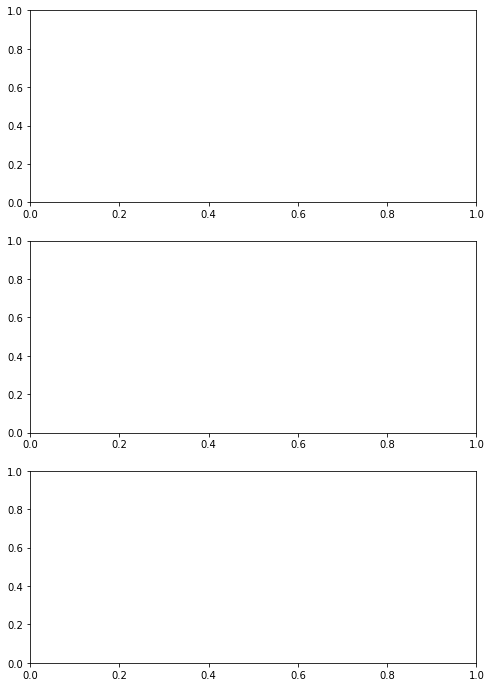

In [15]:
fig, ax = plt.subplots(n_splits, 1, figsize=(8,4*n_splits))
for i, (train_index, test_index) in enumerate(tscv.split(df_lag)):
    df_train, df_test = df_lag.iloc[train_index], df_lag.iloc[test_index]
    model = model = ARIMA(df, order=(1,1,0))
    model.fit(disp=0)(df_train.drop(columns=response_col),
                                        df_train[response_col[0]])  # train model
    # Prediction loop
    predictions = model.predict(df_test.drop(columns=response_col))[:,None]

    # Plot
    plot_ts(ax[i], df_train, df_test, predictions, xlim=df_lag.index[-1], response_cols=response_col)
ax[0].legend(facecolor='w')
ax[i].set_xlabel('time')
fig.tight_layout()